<a href="https://colab.research.google.com/github/Suheet/Loan_default_pred/blob/main/Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction model

In [1]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("nikhil1e9/loan-default")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-default


In [2]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/nikhil1e9/loan-default/versions/2/Loan_default.csv")

In [3]:
df = df.drop(labels= "LoanID", axis = 1)

In [4]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [5]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
cols = [
    "Education",
    "EmploymentType",
    "MaritalStatus",
    "HasMortgage",
    "HasDependents",
    "LoanPurpose",
    "HasCoSigner"
]
# Print unique values for each column
for col in cols:
    if col in df.columns:
        print(f"\nUnique values in '{col}':")
        print(df[col].unique())


Unique values in 'Education':
["Bachelor's" "Master's" 'High School' 'PhD']

Unique values in 'EmploymentType':
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']

Unique values in 'MaritalStatus':
['Divorced' 'Married' 'Single']

Unique values in 'HasMortgage':
['Yes' 'No']

Unique values in 'HasDependents':
['Yes' 'No']

Unique values in 'LoanPurpose':
['Other' 'Auto' 'Business' 'Home' 'Education']

Unique values in 'HasCoSigner':
['Yes' 'No']


In [7]:
import pandas as pd

# Example mapping dictionaries
education_map = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
employment_map = {"Unemployed": 0, "Part-time": 1, "Full-time": 2, "Self-employed": 3}
marital_map = {"Single": 0, "Married": 1, "Divorced": 2}
yes_no_map = {"No": 0, "Yes": 1}
loan_purpose_map = {"Other": 0, "Auto": 1, "Business": 2, "Home": 3, "Education": 4}

# Apply mappings
df["Education"] = df["Education"].map(education_map)
df["EmploymentType"] = df["EmploymentType"].map(employment_map)
df["MaritalStatus"] = df["MaritalStatus"].map(marital_map)
df["HasMortgage"] = df["HasMortgage"].map(yes_no_map)
df["HasDependents"] = df["HasDependents"].map(yes_no_map)
df["LoanPurpose"] = df["LoanPurpose"].map(loan_purpose_map)
df["HasCoSigner"] = df["HasCoSigner"].map(yes_no_map)


In [8]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,2,2,1,1,0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,2,1,0,0,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,2,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,2,1,0,0,2,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,2,0,1,1,0,0


In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Default', axis =1)
y = df['Default']

In [11]:
print(X.shape)
print(y.shape)

(255347, 16)
(255347,)


In [12]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=69,
                                   test_size=0.25,
                                   shuffle=True)

In [13]:
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
predicted = logr.predict(X_train)
print(predicted)

[0 0 0 ... 0 0 0]


In [18]:
logr.predict_proba(X_test)[:,1]

array([0.25755457, 0.1394886 , 0.01951417, ..., 0.02409948, 0.120551  ,
       0.08240939])

In [23]:
score = logr.score(X_train, y_train)
print('Train Accuracy Score', score)

Train Accuracy Score 0.8843611299671036


In [21]:
score = logr.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.8843773986872817


In [25]:
#chatgpt code

from sklearn.metrics import confusion_matrix, classification_report

y_pred_test = logr.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Confusion Matrix:
 [[56369    53]
 [ 7328    87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     56422
           1       0.62      0.01      0.02      7415

    accuracy                           0.88     63837
   macro avg       0.75      0.51      0.48     63837
weighted avg       0.85      0.88      0.83     63837



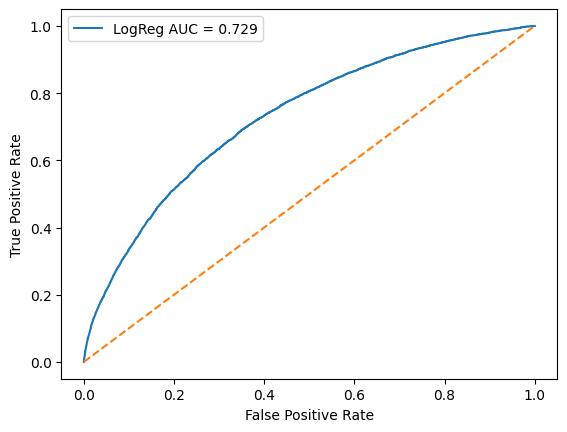

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = logr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"LogReg AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
